In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [108]:
data = pd.read_csv('data.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [109]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [111]:
gender_count = data.groupby(["Gender"]).count()
gender_count

,Height,Weight,Index
Gender,,,
Female,255,255,255
Male,245,245,245


In [112]:
def bmi(weight,height):
    return round((weight/(height**2)*10000),1)

data['BMI'] = bmi(data['Weight'],data['Height'])
weight_status = []
for bmi in data['BMI']:
    if bmi < 18.5:
            weight_status.append('Underweight')
    elif 18.5<=bmi<=24.9:
        weight_status.append('Healthy')
    elif 25.0<=bmi<=29.9:
        weight_status.append('Overweight')
    else:
        weight_status.append('Obese')
data['Weight Status'] = weight_status
data.head()

,Gender,Height,Weight,Index,BMI,Weight Status
0,Male,174,96,4,31.7,Obese
1,Male,189,87,2,24.4,Healthy
2,Female,185,110,4,32.1,Obese
3,Female,195,104,3,27.4,Overweight
4,Male,149,61,3,27.5,Overweight


In [113]:
status_group = data.groupby(["Weight Status", "Gender"]).count()
status_group

Height  Weight  Index  BMI
Weight Status Gender                            
Healthy       Female      38      38     38   38
              Male        26      26     26   26
Obese         Female     167     167    167  167
              Male       165     165    165  165
Overweight    Female      37      37     37   37
              Male        33      33     33   33
Underweight   Female      13      13     13   13
              Male        21      21     21   21

In [114]:
data_male = data.loc[data['Gender']=='Male']
data_female = data.loc[data['Gender']=='Female']

In [115]:
status_group_male = data_male.groupby(["Weight Status"]).count()
status_group_male

,Gender,Height,Weight,Index,BMI
Weight Status,,,,,
Healthy,26,26,26,26,26
Obese,165,165,165,165,165
Overweight,33,33,33,33,33
Underweight,21,21,21,21,21


In [116]:
status_count_male = [status_group_male["Gender"]]
status_count_male


[Weight Status
 Healthy         26
 Obese          165
 Overweight      33
 Underweight     21
 Name: Gender, dtype: int64]

In [117]:
status_values = np.array(status_count_male)
status_values


array([[ 26, 165,  33,  21]], dtype=int64)

In [118]:
list1 = status_values.tolist()
list1
status_value_list = []
for x in list1[0]:
    status_value_list.append(x)
status_value_list
    

[26, 165, 33, 21]

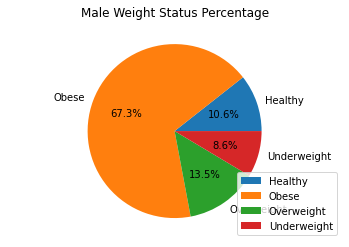

In [119]:
labels = ["Healthy", "Obese", "Overweight", "Underweight"]
plt.axis("equal")
plt.pie(status_value_list, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('Male Weight Status Percentage')
plt.show()

In [120]:
status_group_female = data_female.groupby(["Weight Status"]).count()
status_group_female


,Gender,Height,Weight,Index,BMI
Weight Status,,,,,
Healthy,38,38,38,38,38
Obese,167,167,167,167,167
Overweight,37,37,37,37,37
Underweight,13,13,13,13,13


In [121]:
status_count_female = [status_group_female["Gender"]]
status_count_female

[Weight Status
 Healthy         38
 Obese          167
 Overweight      37
 Underweight     13
 Name: Gender, dtype: int64]

In [122]:
status_values_female = np.array(status_count_female)
status_values_female

array([[ 38, 167,  37,  13]], dtype=int64)

In [123]:
list_fem = status_values_female.tolist()
status_value_list_fem = []
for x in list_fem[0]:
    status_value_list_fem.append(x)
status_value_list_fem

[38, 167, 37, 13]

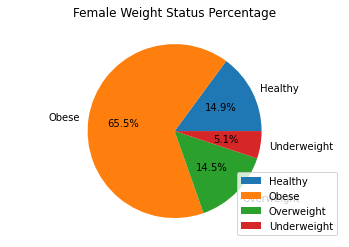

In [124]:
labels = ["Healthy", "Obese", "Overweight", "Underweight"]
plt.axis("equal")
plt.pie(status_value_list_fem, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('Female Weight Status Percentage')
plt.show()

In [125]:
av_male_height = 175.3
av_female_height = 161.6

In [128]:
healthy_ppl = data_male.loc[data_male["Weight Status"] == "Underweight"]
healthy_ppl


,Gender,Height,Weight,Index,BMI,Weight Status
27,Male,187,62,1,17.7,Underweight
31,Male,178,52,1,16.4,Underweight
62,Male,193,54,0,14.5,Underweight
79,Male,181,51,0,15.6,Underweight
85,Male,198,50,0,12.8,Underweight
98,Male,195,69,1,18.1,Underweight
200,Male,184,57,1,16.8,Underweight
224,Male,188,54,0,15.3,Underweight
242,Male,191,62,1,17.0,Underweight
269,Male,168,50,1,17.7,Underweight


ValueError: could not convert string to float: 'Male'